In [39]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz


In [40]:
traindf=pd.read_csv("Data/train.csv")
#print("Original Dataset")

traindf.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [41]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [42]:
traindf.describe()

#Check for duplicates¶
traindf[traindf.duplicated()]

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides


In [43]:
#Feature correlation
Newtraindf = traindf.drop(columns=['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
corr = Newtraindf.corr()
corr

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
deg_C,1.000000,-0.668002,0.445162,0.017513,0.133167,-0.145437,0.308202,-0.050567
relative_humidity,-0.668002,1.000000,0.249013,0.093130,-0.035152,-0.102146,0.027002,0.126466
absolute_humidity,0.445162,0.249013,1.000000,0.105977,0.236894,-0.485445,0.567376,0.124945
sensor_1,0.017513,0.093130,0.105977,1.000000,0.811898,-0.592233,0.643191,0.860849
sensor_2,0.133167,-0.035152,0.236894,0.811898,1.000000,-0.819334,0.812454,0.863464
sensor_3,-0.145437,-0.102146,-0.485445,-0.592233,-0.819334,1.000000,-0.741439,-0.706006
sensor_4,0.308202,0.027002,0.567376,0.643191,0.812454,-0.741439,1.000000,0.641120
sensor_5,-0.050567,0.126466,0.124945,0.860849,0.863464,-0.706006,0.641120,1.000000


<AxesSubplot:>

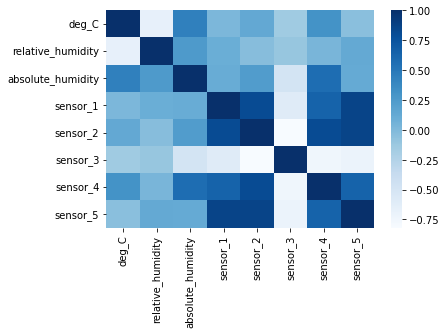

In [44]:
#Use to show relationship between 
sns.heatmap(corr,cmap="Blues")


Text(0, 0.5, 'target_nitrogen_oxides')

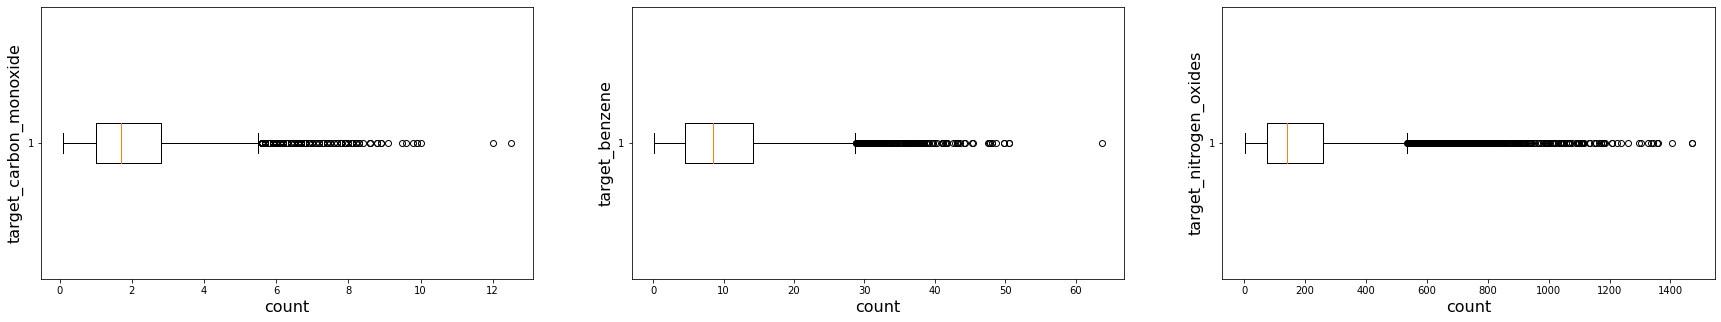

In [45]:


Temp = traindf['deg_C']
ab_hum = traindf['absolute_humidity']
rel_hum = traindf['relative_humidity']
carbon_m = traindf['target_carbon_monoxide']
Benzene=traindf['target_benzene']
Nitrogen_Ox=traindf['target_nitrogen_oxides']

fig2, axes = plt.subplots(nrows=1, ncols=3,figsize=(30, 5))

#Target Distributions for each air

axes[0].boxplot(carbon_m,vert=False)
axes[0].set_xlabel('count',fontsize=16)
axes[0].set_ylabel('target_carbon_monoxide',fontsize=16)

axes[1].boxplot(Benzene,vert=False)
axes[1].set_xlabel('count',fontsize=16)
axes[1].set_ylabel('target_benzene',fontsize=16)


axes[2].boxplot(Nitrogen_Ox,vert=False)
axes[2].set_xlabel('count',fontsize=16)
axes[2].set_ylabel('target_nitrogen_oxides',fontsize=16)



Text(0.5, 1.0, 'relative_humidity over time')

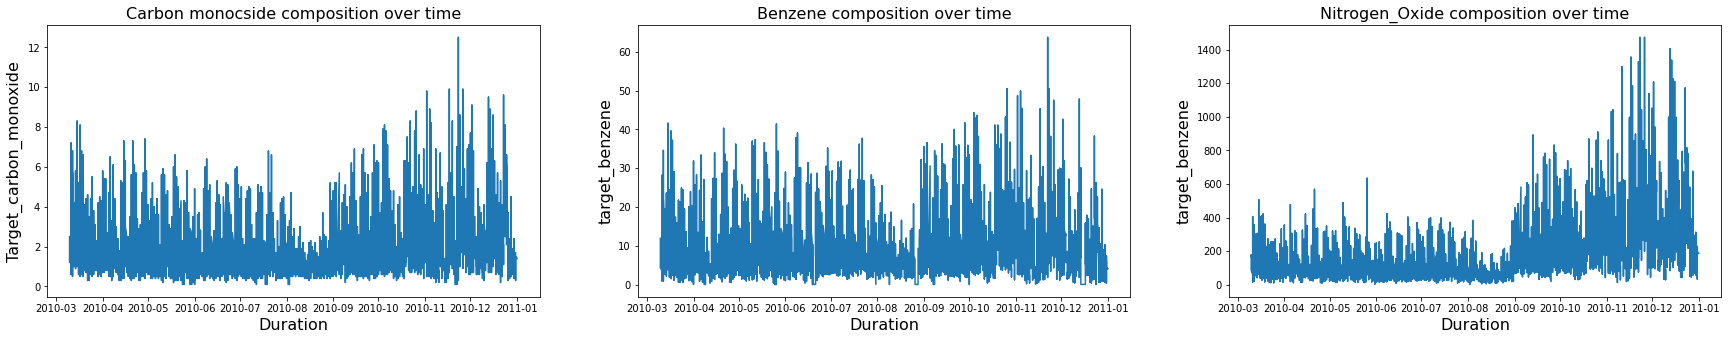

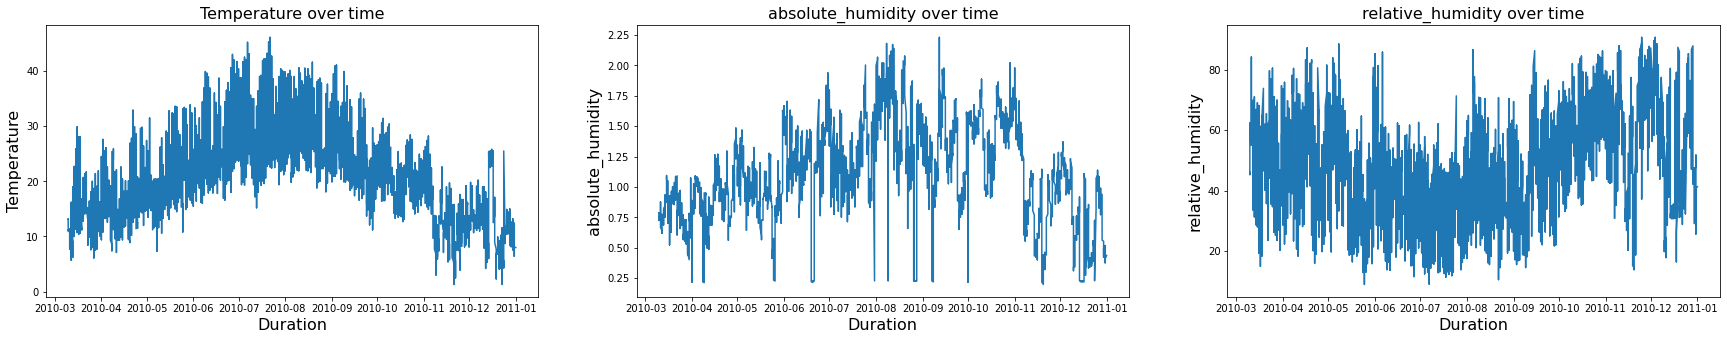

In [46]:
traindf['Dates'] = pd.to_datetime(traindf['date_time']).dt.date
traindf['Time'] = pd.to_datetime(traindf['date_time']).dt.time

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(30, 5))
Date = traindf['Dates']
x = Date


axes[0].plot(x,carbon_m)
axes[0].set_xlabel('Duration',fontsize=16)
axes[0].set_ylabel('Target_carbon_monoxide',fontsize=16)
axes[0].set_title('Carbon monocside composition over time',fontsize=16)

axes[1].plot(x, Benzene)
axes[1].set_xlabel('Duration',fontsize=16)
axes[1].set_ylabel('target_benzene',fontsize=16)
axes[1].set_title('Benzene composition over time',fontsize=16)

axes[2].plot(x, Nitrogen_Ox)
axes[2].set_xlabel('Duration',fontsize=16)
axes[2].set_ylabel('target_benzene',fontsize=16)
axes[2].set_title('Nitrogen_Oxide composition over time',fontsize=16)


fig2, axes = plt.subplots(nrows=1, ncols=3,figsize=(30, 5))

axes[0].plot(x,Temp)
axes[0].set_xlabel('Duration',fontsize=16)
axes[0].set_ylabel('Temperature',fontsize=16)
axes[0].set_title('Temperature over time',fontsize=16)

axes[1].plot(x, ab_hum)
axes[1].set_xlabel('Duration',fontsize=16)
axes[1].set_ylabel('absolute_humidity',fontsize=16)
axes[1].set_title('absolute_humidity over time',fontsize=16)

axes[2].plot(x, rel_hum)
axes[2].set_xlabel('Duration',fontsize=16)
axes[2].set_ylabel('relative_humidity',fontsize=16)
axes[2].set_title('relative_humidity over time',fontsize=16)


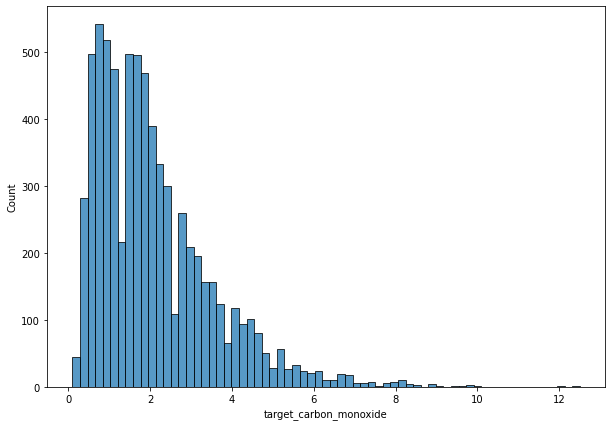

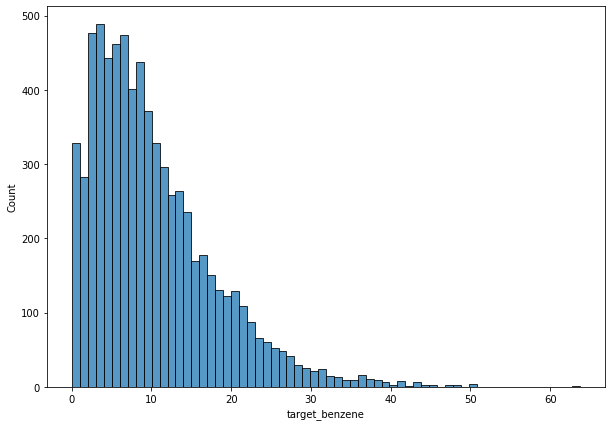

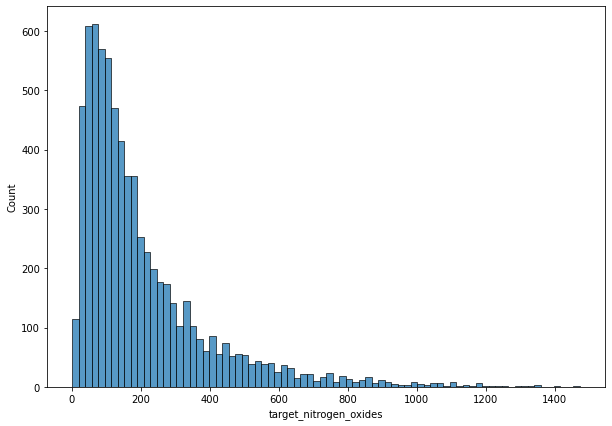

In [47]:
plt.figure(figsize=(10, 7))
sns.histplot(traindf['target_carbon_monoxide'])
plt.figure(figsize=(10, 7))
sns.histplot(traindf['target_benzene']);
plt.figure(figsize=(10, 7))
sns.histplot(traindf['target_nitrogen_oxides']);

In [48]:
#Train and Test Split data

y_target_carbon_monoxide = traindf['target_carbon_monoxide']
y_target_benzene = traindf['target_benzene']
y_target_nitrogen_oxides = traindf['target_nitrogen_oxides']

In [49]:
X=Newtraindf
X_train_carbon_monoxide, X_test_carbon_monoxide, y_train_carbon_monoxide, y_test_carbon_monoxide = train_test_split(X, y_target_carbon_monoxide, test_size = 0.2, random_state = 42)

In [50]:
y_base_carbon_monoxide = [y_train_carbon_monoxide.mean()]*len(y_train_carbon_monoxide)
carbon_monoxide_base_mse = mean_squared_error(y_train_carbon_monoxide, y_base_carbon_monoxide)
carbon_monoxide_base_mae = mean_absolute_error(y_train_carbon_monoxide, y_base_carbon_monoxide)

print(f"Base Carbon Monoxide Mean Square Error: {carbon_monoxide_base_mse}")
print(f"Base Carbon Monoxide Mean Absolute Error: {carbon_monoxide_base_mae}")

Base Carbon Monoxide Mean Square Error: 2.0367504416235924
Base Carbon Monoxide Mean Absolute Error: 1.088287479649708


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import bias_variance_decomp
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import arange
## define model for Carbon monoxide
carbon_monoxide_model = Ridge()
carbon_monoxide_model.fit(X_train_carbon_monoxide, y_train_carbon_monoxide)


#model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(carbon_monoxide_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_carbon_monoxide, y_train_carbon_monoxide)
# summarize
#print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# Ignore the sign; the library makes the MAE negative for optimization purposes

y_pred_carbon_monoxide = carbon_monoxide_model.predict(X_train_carbon_monoxide)
print("Coefficient of determination of the prediction for training data:",carbon_monoxide_model.score(X_train_carbon_monoxide, y_train_carbon_monoxide))

#Score Return the coefficient of determination of the prediction
#That means a measure that assesses the ability of a model to predict or explain an outcome in the linear regression setting.
print("Coefficient of determination of the prediction for testing data:",carbon_monoxide_model.score(X_test_carbon_monoxide, y_test_carbon_monoxide))

carbon_monoxide_intercept = carbon_monoxide_model.intercept_
print("carbon_monoxide_intercept",carbon_monoxide_intercept)

carbon_monoxide_coefficient = carbon_monoxide_model.coef_

print(carbon_monoxide_coefficient)

# estimate bias and variance
mse, bias, var = bias_variance_decomp(carbon_monoxide_model, X_train_carbon_monoxide.values, y_train_carbon_monoxide.values, X_test_carbon_monoxide.values, y_test_carbon_monoxide.values, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


Config: {'alpha': 0.99}
Coefficient of determination of the prediction for training data: 0.8249943387249787
Coefficient of determination of the prediction for testing data: 0.8358165018496961
carbon_monoxide_intercept -4.778869864302225
[ 2.35653135e-02  1.04962949e-02 -5.69306646e-01  2.43216501e-03
  3.26960558e-03  9.22370173e-04 -4.98109539e-04  7.23338656e-04]
MSE: 0.381
Bias: 0.380
Variance: 0.001


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but Ridge was fitted without feature names
  if fitted_feature_names is None and X_feature_names is None:


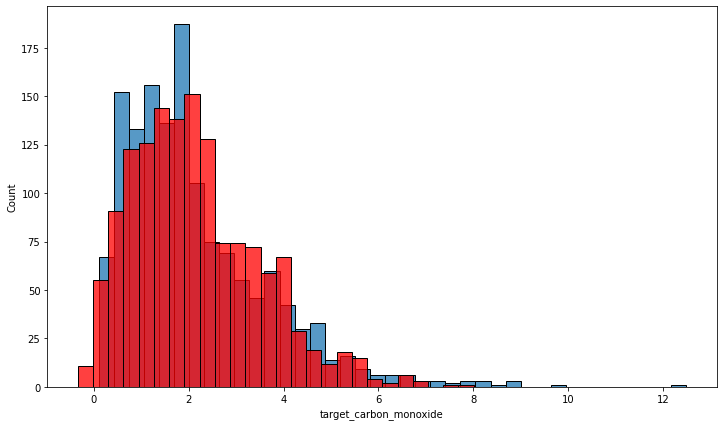

In [52]:
plt.figure(figsize=(12, 7))
sns.histplot(y_test_carbon_monoxide)
sns.histplot(carbon_monoxide_model.predict(X_test_carbon_monoxide), color='red');

In [53]:
#model for Benzene
X_train_benzene, X_test_benzene, y_train_benzene, y_test_benzene = train_test_split(X, y_target_benzene, test_size = 0.2, random_state = 42)

model_benzene = Ridge()
model_benzene.fit(X_train_benzene, y_train_benzene)

#model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_benzene, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_benzene, y_train_benzene)
# summarize
#print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


print("Coefficient of determination of the prediction for training data:",model_benzene.score(X_train_benzene, y_train_benzene))

print("Coefficient of determination of the prediction for testing data:",model_benzene.score(X_test_benzene, y_test_benzene))

benzene_intercept = model_benzene.intercept_
print("Benzene_intercept",benzene_intercept)
benzene_coefficient = model_benzene.coef_
print(list(benzene_coefficient))

# estimate bias and variance
mse, bias, var = bias_variance_decomp(model_benzene, X_train_benzene.values, y_train_benzene.values, X_test_benzene.values, y_test_benzene.values, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


Config: {'alpha': 0.0}
Coefficient of determination of the prediction for training data: 0.9505709079157684
Coefficient of determination of the prediction for testing data: 0.9483539618350864
Benzene_intercept -23.340382945706658
[0.02389752315236557, 0.006801388263478202, -0.37174305447517153, 0.002380868865327443, 0.023402981347112082, 0.003933398544462063, 0.0014383096931364244, 0.0029539984366423622]
MSE: 3.388
Bias: 3.379
Variance: 0.009


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but Ridge was fitted without feature names
  if fitted_feature_names is None and X_feature_names is None:


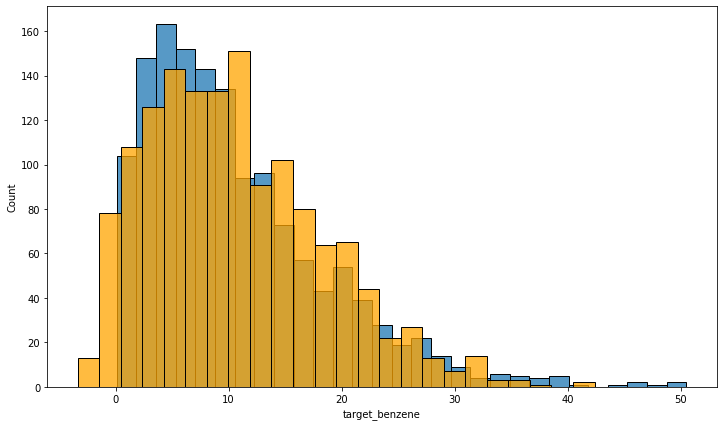

In [54]:
plt.figure(figsize=(12, 7))
sns.histplot(y_test_benzene)
sns.histplot(model_benzene.predict(X_test_benzene), color='orange');

Config: {'alpha': 0.99}
Coefficient of determination of the prediction for training data: 0.6817210207429587
Coefficient of determination of the prediction for testing data: 0.6695651592483305
MSE: 12947.206
Bias: 12916.615
Variance: 30.591
nitro_oxides_intercept -304.58170958481656
[3.1053943097932533, 2.8994099909954976, -5.47273013955045, 0.102851649710863, 0.5736871989544948, 0.07517233178476124, -0.41235231809360484, 0.2204997584600112]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but Ridge was fitted without feature names
  if fitted_feature_names is None and X_feature_names is None:


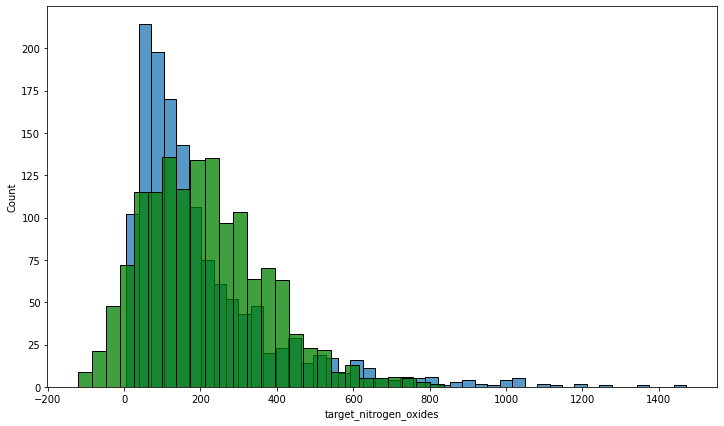

In [55]:
#Nitros Oxide
X_train_nitro_oxides, X_test_nitro_oxides, y_train_nitro_oxides, y_test_nitro_oxides = train_test_split(X, y_target_nitrogen_oxides, test_size = 0.2, random_state = 42)

#Nitros Oxide Model
model_nitro_oxides = Ridge()
model_nitro_oxides.fit(X_train_nitro_oxides, y_train_nitro_oxides)

model_nitro_oxides.score(X_train_nitro_oxides, y_train_nitro_oxides)


model_nitro_oxides.score(X_test_nitro_oxides, y_test_nitro_oxides)
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_nitro_oxides, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_nitro_oxides, y_train_nitro_oxides)
# summarize
#print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


print("Coefficient of determination of the prediction for training data:",model_nitro_oxides.score(X_train_nitro_oxides, y_train_nitro_oxides))

print("Coefficient of determination of the prediction for testing data:",model_nitro_oxides.score(X_test_nitro_oxides, y_test_nitro_oxides))


# estimate bias and variance
mse, bias, var = bias_variance_decomp(model_nitro_oxides, X_train_nitro_oxides.values, y_train_nitro_oxides.values, X_test_nitro_oxides.values, y_test_nitro_oxides.values, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


nitro_oxides_intercept = model_nitro_oxides.intercept_
print("nitro_oxides_intercept",nitro_oxides_intercept)


nitro_oxides_coefficient = model_nitro_oxides.coef_
print(list(nitro_oxides_coefficient))

plt.figure(figsize=(12, 7))
sns.histplot(y_test_nitro_oxides)
sns.histplot(model_nitro_oxides.predict(X_test_nitro_oxides), color='green');

In [56]:
testdf=pd.read_csv("Data/test.csv")
print(testdf)
test_features = testdf.drop(columns=['date_time'])
test_features.head()

         date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0      1/1/11 0:00    8.0               41.3             0.4375    1108.8   
1      1/1/11 1:00    5.1               51.7             0.4564    1249.5   
2      1/1/11 2:00    5.8               51.5             0.4689    1102.6   
3      1/1/11 3:00    5.0               52.3             0.4693    1139.7   
4      1/1/11 4:00    4.5               57.5             0.4650    1022.4   
...            ...    ...                ...                ...       ...   
2242  4/4/11 10:00   23.2               28.7             0.7568    1340.3   
2243  4/4/11 11:00   24.5               22.5             0.7119    1232.8   
2244  4/4/11 12:00   26.6               19.0             0.6406    1187.7   
2245  4/4/11 13:00   29.1               12.7             0.5139    1053.2   
2246  4/4/11 14:00   27.9               13.5             0.5028    1124.6   

      sensor_2  sensor_3  sensor_4  sensor_5  
0        745.7     797.1    

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [57]:
test_carbon_monoxide = carbon_monoxide_model.predict(test_features)
test_benzene = model_benzene.predict(test_features)
test_nitrogen_oxides = model_nitro_oxides.predict(test_features)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but Ridge was fitted without feature names
  if fitted_feature_names is None and X_feature_names is None:
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but Ridge was fitted without feature names
  if fitted_feature_names is None and X_feature_names is None:
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but Ridge was fitted without feature names
  if fitted_feature_names is None and X_feature_names is None:


In [58]:
Final_Predicition = pd.DataFrame({'date_time': testdf.date_time, 'target_carbon_monoxide': test_carbon_monoxide, 'target_benzene': test_benzene, 'target_nitrogen_oxides': test_nitrogen_oxides})

Final_Predicition.to_csv('predictions.csv', index=False)

In [59]:
print(Final_Predicition)

         date_time  target_carbon_monoxide  target_benzene  \
0      1/1/11 0:00                2.000628        5.197162   
1      1/1/11 1:00                2.959362        9.362337   
2      1/1/11 2:00                2.328640        8.091555   
3      1/1/11 3:00                2.507878        9.229514   
4      1/1/11 4:00                2.076102        7.306219   
...            ...                     ...             ...   
2242  4/4/11 10:00                3.271979       13.128823   
2243  4/4/11 11:00                2.628874       10.262695   
2244  4/4/11 12:00                2.664741       11.808136   
2245  4/4/11 13:00                2.301163        9.973994   
2246  4/4/11 14:00                2.560330       11.429938   

      target_nitrogen_oxides  
0                 357.221280  
1                 511.864037  
2                 427.863102  
3                 423.406330  
4                 378.400932  
...                      ...  
2242              410.498641  
2243   